In [1]:
# import package
import teetool as tt

/Users/will/anaconda/envs/tt/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# generate trajectory data

cluster_data_1 = tt.helpers.get_trajectories(ntype=0,
                                             ndim=2,
                                             ntraj=500,
                                             npoints=100,
                                             noise_std=0.0)

cluster_data_2 = tt.helpers.get_trajectories(ntype=1,
                                             ndim=2,
                                             ntraj=500,
                                             npoints=100,
                                             noise_std=0.0)

In [3]:
# create a world
world = tt.World(name="toy", ndim=2, resolution=[100, 100])

# add data
world.addCluster(cluster_data_1, "one")
world.addCluster(cluster_data_2, "two")

/Users/will/anaconda/envs/tt/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


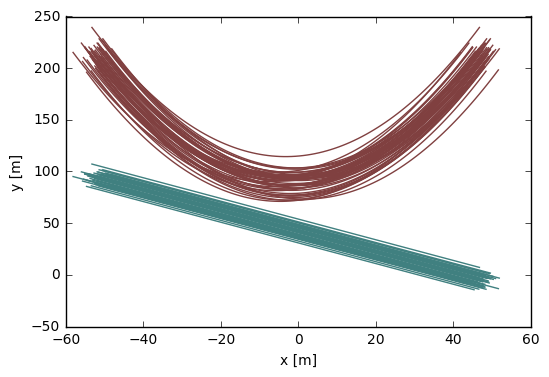

In [4]:
% matplotlib inline

# visual
visual = tt.visual_2d.Visual_2d(world)

# plot 50 trajectories
visual.plotTrajectories(ntraj=50)

# plot points along line
#visual.plotTrajectoriesPoints(x1=0.3, ntraj=50, marker='o', markersize=3)
#visual.plotTrajectoriesPoints(x1=0.7, ntraj=50, marker='o', markersize=3)

# obtain limits
xlim = visual._ax.get_xlim()
ylim = visual._ax.get_ylim()

# set labels
visual._ax.set_xlabel("x [m]")
visual._ax.set_ylabel("y [m]")

visual._ax.legend()

# show
visual.show()

In [5]:
# build the model
settings = {"model_type":"resampling",
            "ngaus":100}

world.buildModel(settings)

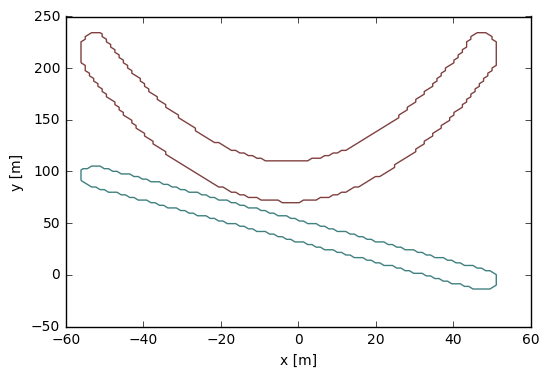

In [6]:
% matplotlib inline

# visual
visual = tt.visual_2d.Visual_2d(world)

# add confidence region(s)
visual.plotTube(sdwidth=2)

# plot points along line
#visual.plotTrajectoriesPoints(x1=0.3, ntraj=50, marker='o', markersize=3)
#visual.plotTrajectoriesPoints(x1=0.7, ntraj=50, marker='o', markersize=3)

# set limits
visual._ax.set_xlim(xlim)
visual._ax.set_ylim(ylim)

# set labels
visual._ax.set_xlabel("x [m]")
visual._ax.set_ylabel("y [m]")

# show
visual.show()